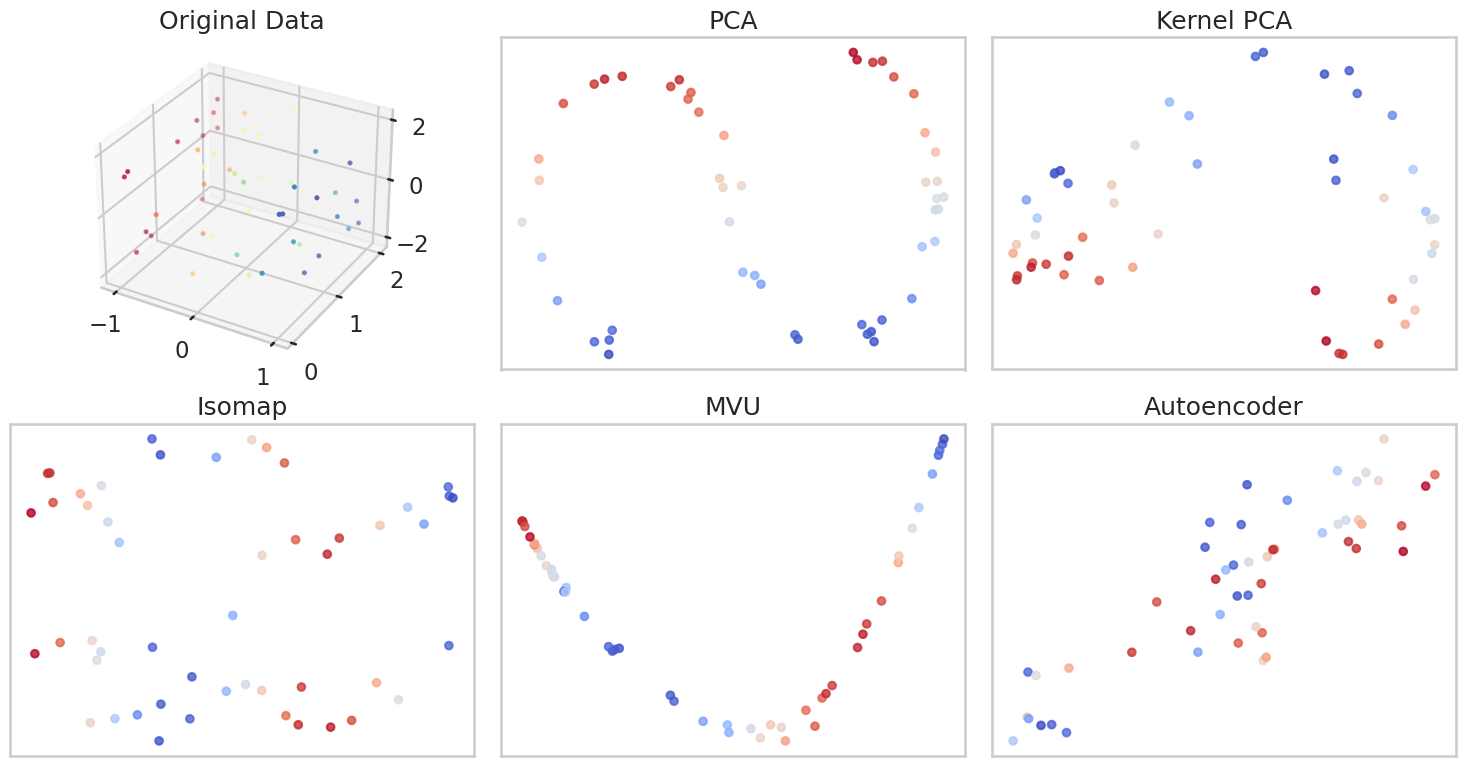

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap

from methods.autoencoder import DominanceAutoEncoder
from methods.mvu import MaximumVarianceUnfolding

# Set seaborn style for presentation
sns.set_context("talk")
sns.set_style("whitegrid")

# Generate S-curve dataset
n_samples = 50
X, _ = make_s_curve(n_samples, noise=0.05, random_state=42)

# Apply dimensionality reduction methods
n = 2
pca = PCA(n_components=n, random_state=42)
kpca = KernelPCA(n_components=n, random_state=42, kernel="rbf")
isomap = Isomap(n_components=n)
mvu = MaximumVarianceUnfolding(n_components=n, seed=42)
autoencoder = DominanceAutoEncoder(latent_dim=n, random_state=42, verbose=False)

X_pca = pca.fit_transform(X)
X_kpca = kpca.fit_transform(X)
X_isomap = isomap.fit_transform(X)
X_mvu = mvu.fit_transform(X)
X_autoencoder = autoencoder.fit_transform(X)

# Plot the results
fig = plt.figure(figsize=(15, 8))

# Original 3D plot
ax = fig.add_subplot(2, 3, 1, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap="Spectral", s=5)
ax.set_title("Original Data")


# Function to plot 2D results
def plot_2d(ax, X_transformed, title):
    sc = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=X[:, 0], cmap="coolwarm", s=30, alpha=0.8)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])


# 2D projections
plot_2d(fig.add_subplot(2, 3, 2), X_pca, "PCA")
plot_2d(fig.add_subplot(2, 3, 3), X_kpca, "Kernel PCA")
plot_2d(fig.add_subplot(2, 3, 4), X_isomap, "Isomap")
plot_2d(fig.add_subplot(2, 3, 5), X_mvu, "MVU")
plot_2d(fig.add_subplot(2, 3, 6), X_autoencoder, "Autoencoder")

plt.tight_layout()
plt.savefig("../data/_miscellaneous/s-curve.png")
plt.show()